In [2]:
from Bio import SeqIO
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils.ProtParam import ProteinAnalysis

/home/nguyen/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [4]:
covid = SeqIO.read("virus_datasets/covid_sequences.fasta", "fasta")
mers = SeqIO.read("virus_datasets/mers_sequence.fasta", "fasta")
sars = SeqIO.read("virus_datasets/sars_sequence.fasta", "fasta")
ebola = SeqIO.read("virus_datasets/ebola_sequence.fasta", "fasta")
hiv = SeqIO.read("virus_datasets/hiv_sequence.fasta", "fasta")

In [5]:
# Convert or Get the sequences
covid_seq = covid.seq
mers_seq = mers.seq
sars_seq = sars.seq
ebola_seq = ebola.seq
hiv_seq = hiv.seq

# Check the length of each sequence
print("covid_seq ::", len(covid_seq))
print("mers_seq ::", len(mers_seq))
print("sars_seq ::", len(sars_seq))
print("ebola_seq ::", len(ebola_seq))
print("hiv_seq ::", len(hiv_seq))

covid_seq :: 29903
mers_seq :: 30119
sars_seq :: 29751
ebola_seq :: 18959
hiv_seq :: 9181


In [6]:
print("GC content of covid_seq ::", gc_fraction(covid_seq))
print("GC content of mers_seq ::", gc_fraction(mers_seq))
print("GC content of sars_seq ::", gc_fraction(sars_seq))
print("GC content of ebola_seq ::", gc_fraction(ebola_seq))
print("GC content of hiv_seq ::", gc_fraction(hiv_seq))

GC content of covid_seq :: 0.3797277865097147
GC content of mers_seq :: 0.4123642883229855
GC content of sars_seq :: 0.407616550704178
GC content of ebola_seq :: 0.4107284139458832
GC content of hiv_seq :: 0.4211959481537959


In [7]:
def pad_seq(seq):
    if len(seq) % 3 == 0:
        return seq
    elif len(seq) % 3 == 1:
        return seq + Seq("NN")
    else:
        return seq + Seq("N")

In [9]:
covid_proteins = []
mers_proteins = []
sars_proteins = []
ebola_proteins = []
hiv_proteins = []

for i in range(3):
    covid_proteins.append(pad_seq(covid_seq[i:]).translate())
    mers_proteins.append(pad_seq(mers_seq[i:]).translate())
    sars_proteins.append(pad_seq(sars_seq[i:]).translate())
    ebola_proteins.append(pad_seq(ebola_seq[i:]).translate())
    hiv_proteins.append(pad_seq(hiv_seq[i:]).translate())

print("covid_protein ::", len(covid_proteins[0]))
print("mers_protein ::", len(mers_proteins[0]))
print("sars_protein ::", len(sars_proteins[0]))
print("ebola_protein ::", len(ebola_proteins[0]))
print("hiv_protein ::", len(hiv_proteins[0]))

covid_protein :: 9968
mers_protein :: 10040
sars_protein :: 9917
ebola_protein :: 6320
hiv_protein :: 3061


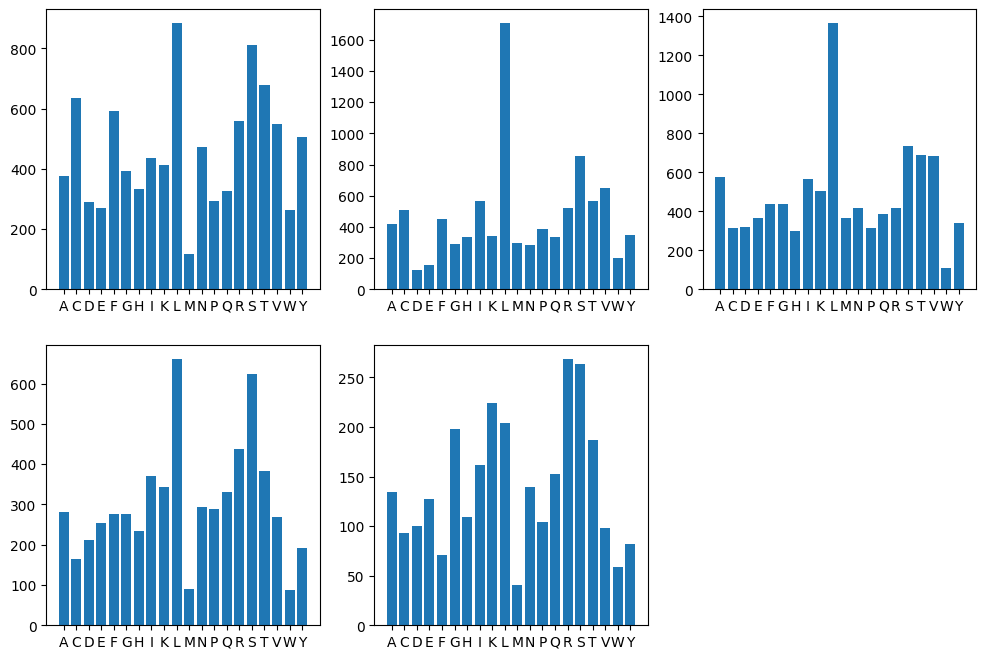

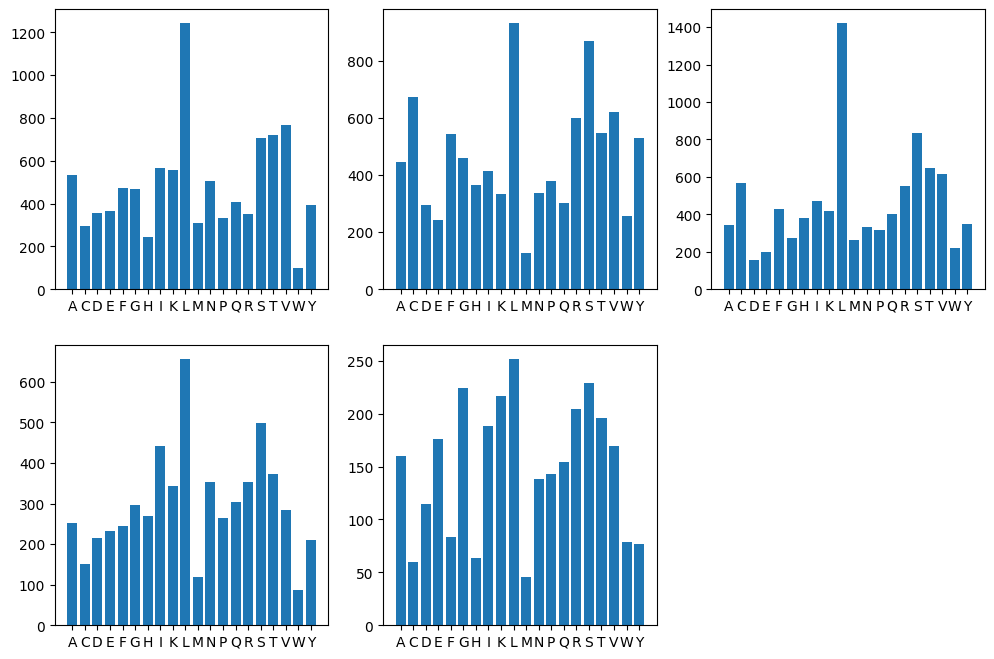

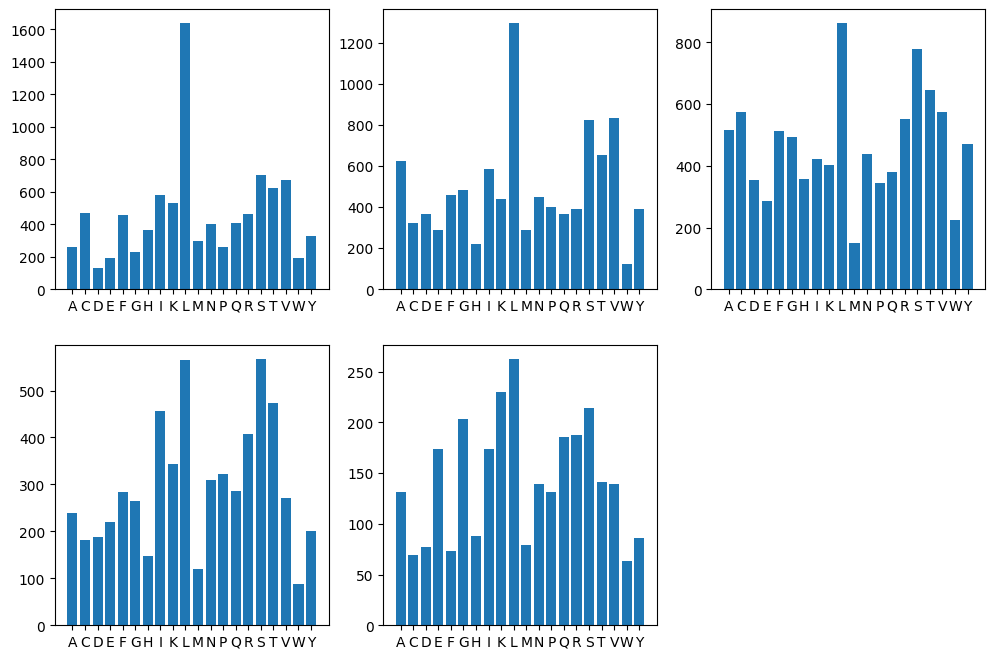

In [14]:
for i in range(3):
    covid_analysed = ProteinAnalysis(str(covid_proteins[i]))
    mers_analysed = ProteinAnalysis(str(mers_proteins[i]))
    sars_analysed = ProteinAnalysis(str(sars_proteins[i]))
    ebola_analysed = ProteinAnalysis(str(ebola_proteins[i]))
    hiv_analysed = ProteinAnalysis(str(hiv_proteins[i]))

    covid_freq = covid_analysed.count_amino_acids()
    mers_freq = mers_analysed.count_amino_acids()
    sars_freq = sars_analysed.count_amino_acids()
    ebola_freq = ebola_analysed.count_amino_acids()
    hiv_freq = hiv_analysed.count_amino_acids()

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.bar(covid_freq.keys(), covid_freq.values())
    plt.subplot(2, 3, 2)
    plt.bar(mers_freq.keys(), mers_freq.values())
    plt.subplot(2, 3, 3)
    plt.bar(sars_freq.keys(), sars_freq.values())
    plt.subplot(2, 3, 4)
    plt.bar(ebola_freq.keys(), ebola_freq.values())
    plt.subplot(2, 3, 5)
    plt.bar(hiv_freq.keys(), hiv_freq.values())
    plt.show()

### Độ tương đồng giữa các virus

In [15]:
cov_n_sars = pairwise2.align.globalxx(
    covid_seq, sars_seq, one_alignment_only=True, score_only=True
)
print("covid vs sars:", cov_n_sars, "nucleotides")
print(cov_n_sars / len(covid_seq) * 100)

cov_n_mers = pairwise2.align.globalxx(
    covid_seq, mers_seq, one_alignment_only=True, score_only=True
)
print("\ncovid vs mers:", cov_n_mers, "nucleotides")
print(cov_n_mers / len(covid_seq) * 100)

cov_n_ebola = pairwise2.align.globalxx(
    covid_seq, ebola_seq, one_alignment_only=True, score_only=True
)
print("\ncovid vs ebola:", cov_n_ebola, "nucleotides")
print(cov_n_ebola / len(covid_seq) * 100)

cov_n_hiv = pairwise2.align.globalxx(
    covid_seq, hiv_seq, one_alignment_only=True, score_only=True
)
print("\ncovid vs hiv:", cov_n_hiv, "nucleotides")
print(cov_n_hiv / len(covid_seq) * 100)

covid vs sars: 24794.0 nucleotides
82.91475771661706

covid vs mers: 20900.0 nucleotides
69.89265291107915

covid vs ebola: 15189.0 nucleotides
50.79423469217136

covid vs hiv: 9013.0 nucleotides
30.140788549643847


### Tìm các chuỗi con (Local alignment)

COVID vs SARS

In [21]:
from Bio import Align

aligner = Align.PairwiseAligner()
aligner.mode = "local"

alignments = aligner.align(covid_seq, sars_seq)
print(len(alignments))

OverflowError: number of optimal alignments is larger than 9223372036854775807

In [35]:
from Bio import Align

aligner = Align.PairwiseAligner()
aligner.mode = "local"

alignments = aligner.align(covid_seq[:100], sars_seq[:100])
print(len(alignments))

1806336


In [36]:
alignment = alignments[0]
print(alignment)

target            0 AT-T-AAAGGTTTAT-ACCTT-CCCAGGTAACAAA-CCAACCAAC-TTTCGATCTCTTGT
                  0 ||-|-|--|||||-|-||||--||||||-||-||--|||||||||-|--|||||||||||
query             0 ATATTA--GGTTT-TTACCT-ACCCAGG-AA-AA-GCCAACCAACCT--CGATCTCTTGT

target           54 AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT-GGCTGTCA-CTC 100
                 60 |||||||||||||||||||||||||||||||||||-|-|||||--||| 108
query            51 AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAG-CTGTC-GCTC  97



In [37]:
alignment.score

89.0

In [27]:
print(aligner)

Pairwise sequence aligner with parameters
  wildcard: None
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: local



COVID vs HIV

In [30]:
aligner = Align.PairwiseAligner()
aligner.mode = "local"

alignments = aligner.align(covid_seq[:100], hiv_seq[:100])
print(len(alignments))

45187020088934400


In [32]:
alignment = alignments[0]
print(alignment)

target            6 GGT-TTATACCTTCCCA-GGT-A-ACAAACCA-ACCAACTTTC-GAT-CTCTTGTAG-A-
                  0 |||-|----|-|-|----|||-|-||---|-|-|-----|--|-||--|-||-|--|-|-
query             0 GGTCT----C-T-C---TGGTTAGAC---C-AGA-----T--CTGA-GC-CT-G--GGAG

target           57 -TCTGTTCT--CTAAAC--G--AAC----T--TTAA-----AAT----CTGTG--T-G-G
                 60 -|||---||--||||-|--|--|||----|--||||-----|||----||-||--|-|-|
query            35 CTCT---CTGGCTAA-CTAGGGAACCCACTGCTTAAGCCTCAATAAAGCT-TGCCTTGAG

target           91 CTG-T-CAC--T  99
                120 -||-|-||---| 132
query            90 -TGCTTCA-AGT 100



In [33]:
alignment.score

61.0